## Load Data

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
df = pd.read_excel('PR.xlsx',sheet_name= 3)

In [143]:
type(df)
df.head()

,MPG,Cylinders,cc Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Auto
0,18.0,8,307.0,130,3504,12.0,70,USA,\tchevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,\tbuick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,\tplymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,\tamc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,\tford torino


In [144]:
df.isna().sum()

MPG                0
Cylinders          0
cc Displacement    0
Horsepower         0
Weight             0
Acceleration       0
Model Year         0
Origin             0
Auto               0
dtype: int64

In [145]:
df.describe()

,MPG,Cylinders,cc Displacement,Horsepower,Weight,Acceleration,Model Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


##### We assume null hypothesis such that there is no relation between input variables and output variables which is that the beta coefficients is equal to zero.
##### Alternate hypothesis is that there is relation between input and output variable so that the beta coefficients are not zero

## Exploratory Data Analysis

In [146]:
df.corr()

,MPG,Cylinders,cc Displacement,Horsepower,Weight,Acceleration,Model Year
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
cc Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
Model Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


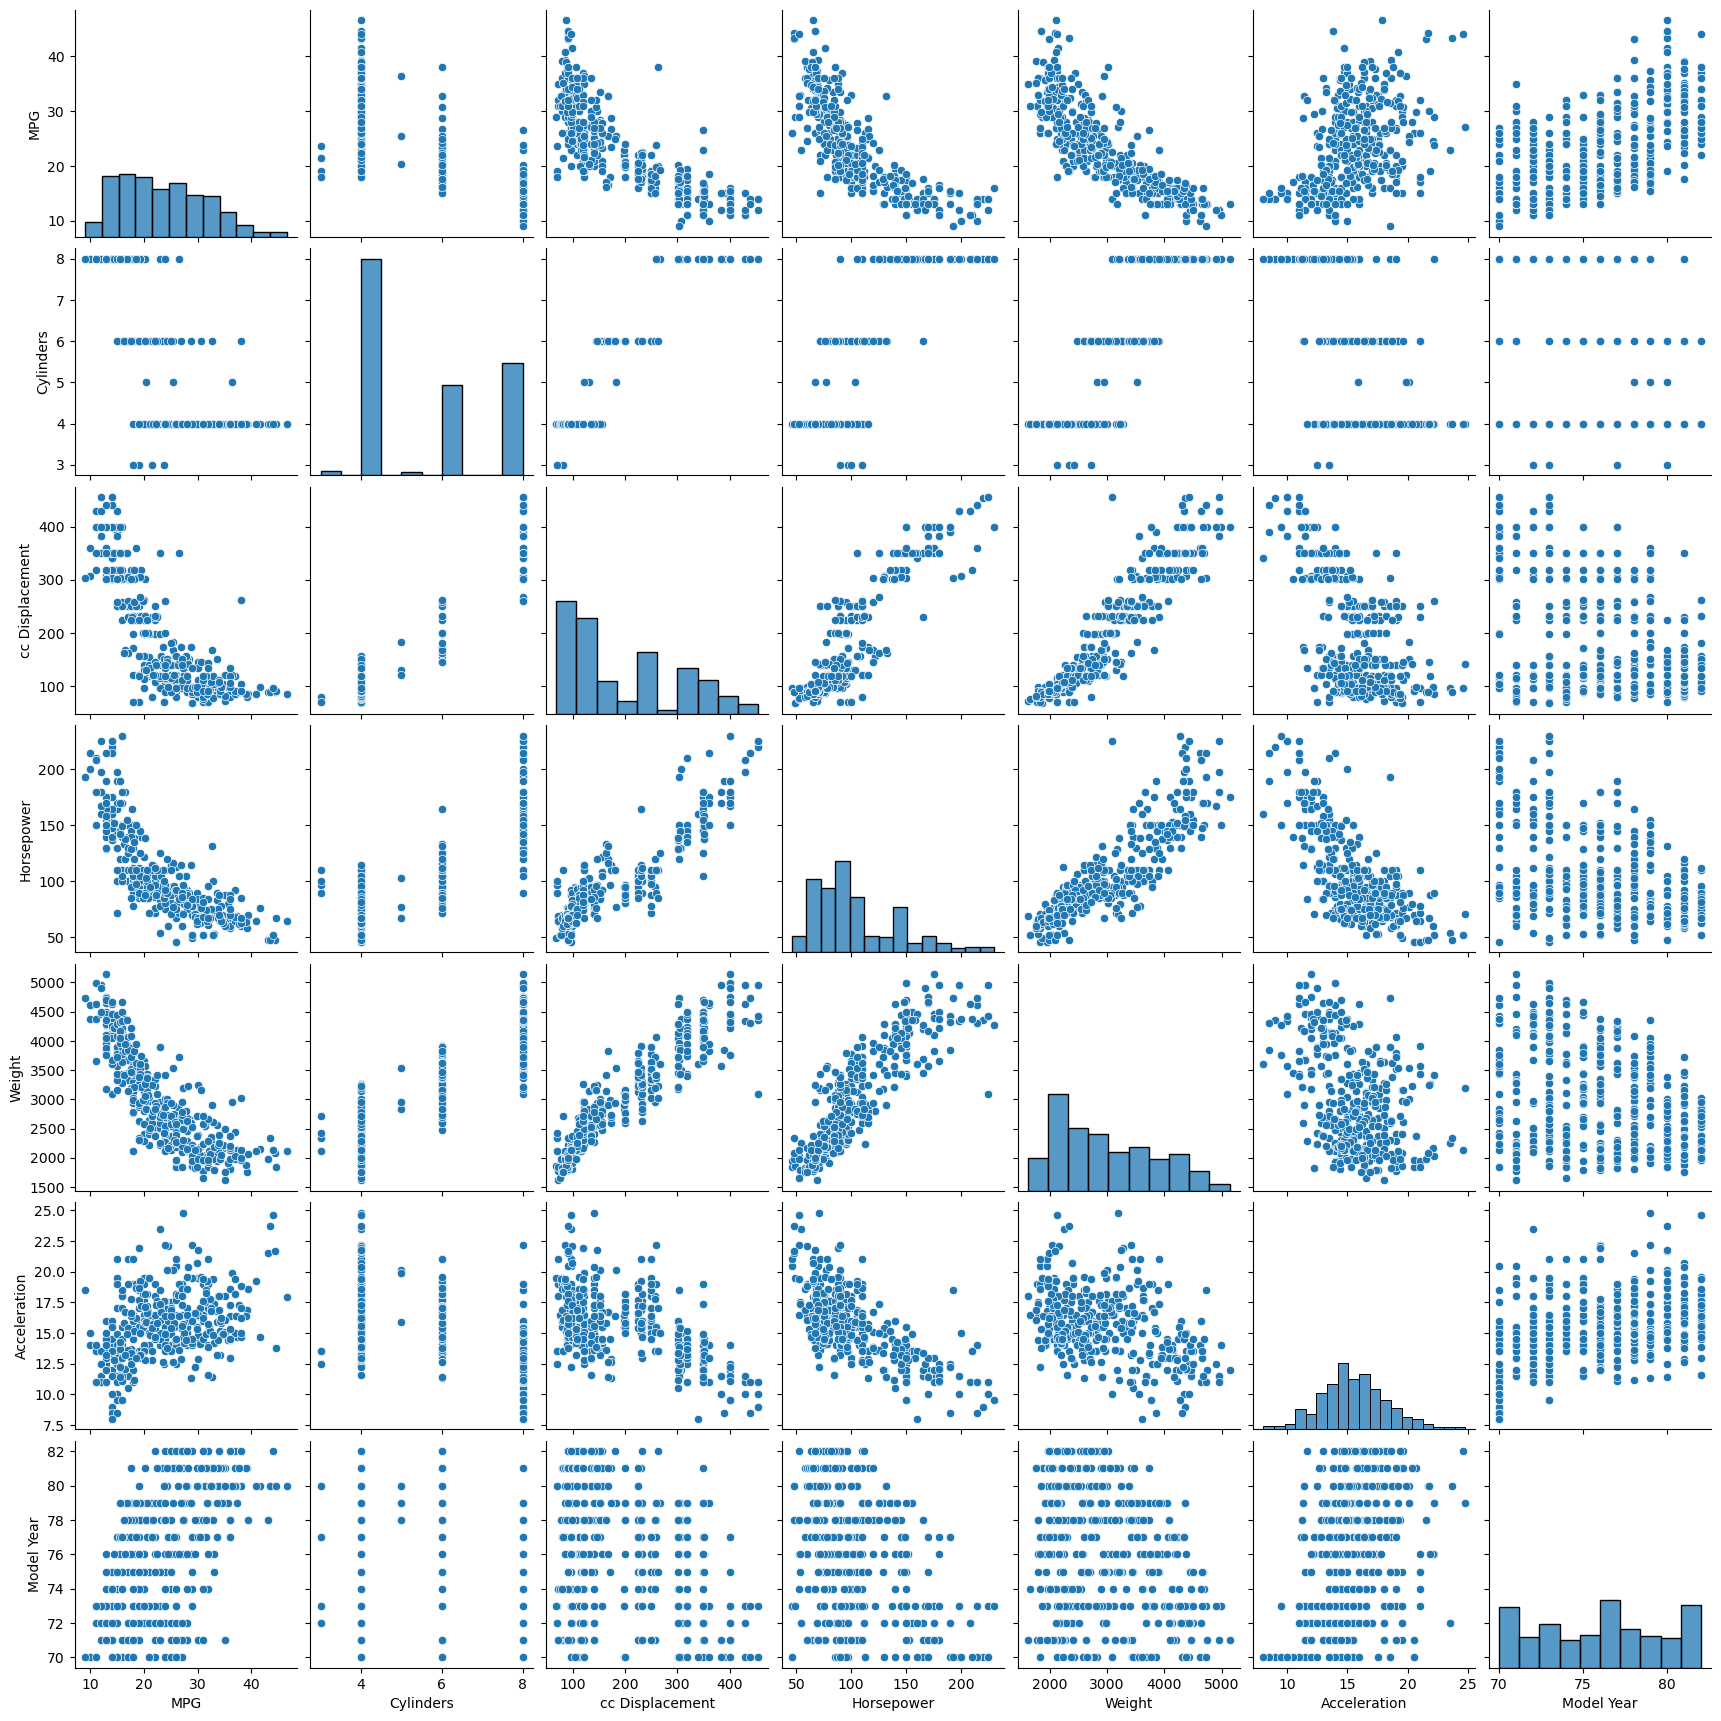

In [147]:
sns.pairplot(df)

In [148]:
df.head()

,MPG,Cylinders,cc Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Auto
0,18.0,8,307.0,130,3504,12.0,70,USA,\tchevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,\tbuick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,\tplymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,\tamc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,\tford torino


## Encoding

In [149]:
##df = df.join(pd.get_dummies(df['Cylinders'],prefix= 'cylinders_'))
##df = df.join(pd.get_dummies(df['Model Year'],prefix= 'year_'))
df = df.join(pd.get_dummies(df['Origin'],prefix= 'origin_'))

In [150]:
df.head()

,MPG,Cylinders,cc Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Auto,origin__Europe,origin__Japan,origin__USA
0,18.0,8,307.0,130,3504,12.0,70,USA,\tchevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,USA,\tbuick skylark 320,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,USA,\tplymouth satellite,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,USA,\tamc rebel sst,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,USA,\tford torino,0,0,1


In [151]:
## df = df.drop(['Cylinders','Model Year','Origin','Auto'],axis=1)
df = df.drop(['Auto','Origin'],axis=1)

## Split data

In [152]:
X = df.drop(['MPG'],axis=1)
Y = df['MPG']

In [153]:
X.head()

,Cylinders,cc Displacement,Horsepower,Weight,Acceleration,Model Year,origin__Europe,origin__Japan,origin__USA
0,8,307.0,130,3504,12.0,70,0,0,1
1,8,350.0,165,3693,11.5,70,0,0,1
2,8,318.0,150,3436,11.0,70,0,0,1
3,8,304.0,150,3433,12.0,70,0,0,1
4,8,302.0,140,3449,10.5,70,0,0,1


In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Modeling

In [155]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Intercept and Beta coefficient

In [156]:
print(model.intercept_)
print(model.coef_)

-15.499852842200006
[-0.33310348  0.02043511 -0.0287697  -0.00632182  0.04129408  0.77819537
  1.10385395  1.12916974 -2.23302369]


## Predictions

In [157]:
test_pred = model.predict(X_test)
test_pred

array([27.18313465, 27.1137765 , 34.42749367, 24.51965856, 28.1397483 ,
       30.31792039,  8.62951145, 30.47504439, 20.52420346, 30.06210953,
       12.59139672, 24.97140612, 16.82484156, 29.42205819, 22.90419684,
       28.84473973, 20.23904278, 33.21744527, 26.3233558 , 31.30754596,
       18.78553805, 36.12013685, 35.34586703, 14.953345  , 29.77516512,
       26.81434277, 22.22342237, 15.99675866, 30.27826644, 25.45699696,
       13.45684638, 23.53661524, 20.76892542, 31.75165735, 12.54405065,
       36.09787267, 10.67248113, 23.9174239 , 11.29079807,  6.65002263,
       12.83716005, 28.85312918, 36.21492323, 27.65478144, 11.99848941,
        9.73691626, 17.62336429, 32.76504392, 24.15900237, 31.58071812,
       11.92173725, 26.14195764, 22.78567079, 34.97302622, 28.28391249,
       17.74497792, 20.35115337, 22.73603938, 23.84570627, 25.61791238,
        8.39023181, 22.78697021, 25.43646287, 24.56508375, 29.71308886,
       30.11798192, 25.40369633, 30.79426393, 21.81711467, 10.11

## Evaluation

In [158]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [159]:
print("MAE: ",mean_absolute_error(test_pred,y_test))
print("MSE: ",mean_squared_error(test_pred,y_test))
print("RSME: ",np.sqrt(mean_absolute_error(test_pred,y_test)))
print("R_score: ",r2_score(test_pred,y_test))
print("model score: ",model.score(X_test,y_test))

MAE:  2.5344897258611105
MSE:  10.344169215429336
RSME:  1.5920080797097453
R_score:  0.8183969099054141
model score:  0.8044759002829673


## Polynomial Exponents modeling


In [160]:
from sklearn.preprocessing import PolynomialFeatures
poly_conv = PolynomialFeatures(degree=2,include_bias=False)

In [161]:
X_poly = poly_conv.fit_transform(X)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

316.69856720192126
[-7.88930983e+05 -5.23808702e-01  3.48869179e-01  1.48975694e-02
 -4.00196210e+00 -5.61349227e+00 -8.74715543e+00 -4.76008959e+00
  1.35072617e+01 -4.85445356e-01 -3.28313709e-03  5.20026699e-03
  1.93985832e-03  3.21970598e-01 -1.82861864e-01  7.88938956e+05
  7.88941686e+05  7.88939608e+05  2.45919295e-04 -8.19917674e-05
 -2.29417316e-05 -1.20356913e-03  9.27783629e-03 -2.01223498e-01
 -1.36929986e-01 -1.89269450e-01 -3.62265157e-04  8.76300800e-06
 -1.56075479e-02 -3.44583894e-03  1.06601755e-01  1.10191930e-01
  1.32857821e-01  4.30991765e-07  1.78333499e-04 -4.92587921e-04
  5.81891186e-03  2.38941057e-03  6.57764498e-03 -3.33149960e-02
  7.66126438e-02 -9.29996568e-01 -1.22795937e+00 -1.84399667e+00
  5.37248435e-02 -1.64269005e+00 -1.82617930e+00 -2.14464090e+00
 -8.74711979e+00  0.00000000e+00  0.00000000e+00 -4.76009500e+00
  0.00000000e+00  1.35072148e+01]


In [163]:
test_pred = model.predict(X_test)
test_pred

array([27.46695175, 23.31460681, 36.23050413, 24.27801946, 28.8049766 ,
       29.58207834, 12.79192624, 29.26683477, 19.32828825, 34.13229648,
       16.26142437, 25.56294515, 16.18734808, 28.73574557, 16.72018657,
       27.9576437 , 19.97894333, 33.47054427, 27.62668913, 30.27967191,
       20.19078703, 46.82639164, 37.2917771 , 14.72194989, 31.396274  ,
       26.31121418, 20.07617438, 17.77150698, 31.64255619, 23.19186455,
       14.1382438 , 21.92067076, 17.63192176, 31.24662136, 13.89154297,
       38.79800179, 14.62771793, 27.07918504, 13.99076412,  9.0938572 ,
       14.76708785, 29.32138176, 39.36238149, 27.53955885, 14.09623164,
       12.7952197 , 16.92745422, 33.9136649 , 21.14120712, 31.8357597 ,
       12.75124892, 24.84719177, 24.3852486 , 36.1852363 , 27.72217765,
       14.53029167, 16.1869531 , 19.82742288, 22.76121404, 25.95837935,
       12.24241224, 20.15689072, 24.25786101, 22.55136205, 27.12318035,
       28.44397137, 25.55362335, 30.92199053, 18.10396539, 13.91

In [164]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("MAE: ",mean_absolute_error(test_pred,y_test))
print("MSE: ",mean_squared_error(test_pred,y_test))
print("RSME: ",np.sqrt(mean_absolute_error(test_pred,y_test)))
print("R_score: ",r2_score(test_pred,y_test))
print("model score: ",model.score(X_test,y_test))
## Polynomial Exponents modeling


MAE:  2.0407963068357877
MSE:  7.819035776694189
RSME:  1.428564421661056
R_score:  0.8730516769641676
model score:  0.8522056340094445


## Checking for Assumptions

## Linearity of error

In [165]:
res = y_test - test_pred
res

78    -1.466952
274   -1.714607
246   -0.130504
55     1.721981
387   -1.804977
         ...   
79    -3.060710
310    1.442691
352    4.707710
248    2.547442
153   -4.480281
Name: MPG, Length: 118, dtype: float64

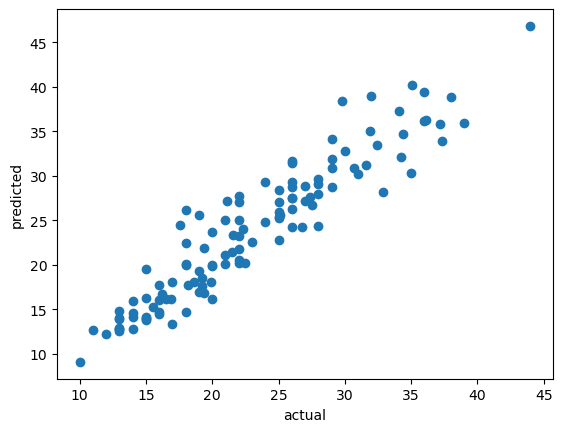

In [166]:
plt.scatter(y_test,test_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

Linearity Assumption is being satisfied 

## Normality of error

<function matplotlib.pyplot.show(close=None, block=None)>

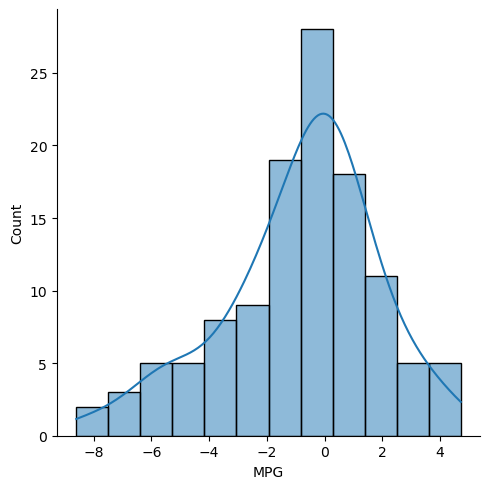

In [167]:
sns.displot(res,kde=True)
plt.show

Normality is being satisfied.

## Equality of varience

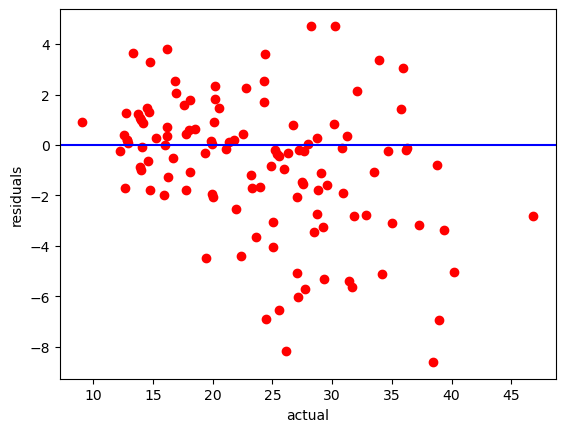

In [169]:
plt.scatter(test_pred,res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('actual')
plt.ylabel('residuals')
plt.show()

Equality of Varience is not sattisfied

## varibles significance

In [170]:
import statsmodels.api as smf

model2 = smf.OLS(Y,X)
results = model2.fit()
# Access the summary information
summary = results.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 21 May 2023   Prob (F-statistic):          1.79e-139
Time:                        07:42:03   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Cylinders          -0.4897      0.321     

looking at the provided coefficient summary, variables such as cc Displacement, Weight, Model Year, origin__Europe, origin__Japan, and origin__USA have p-values less than 0.05, suggesting a statistically significant relationship with the response variable. On the other hand, variables such as Cylinders, Horsepower, and Acceleration have p-values greater than 0.05, indicating no significant relationship with the response variable.

### for degrees of freedom in range 1 to 10

In [180]:
test_rsme_ =[]
for d in range(1,10):

    poly_conv = PolynomialFeatures(degree=d,include_bias=False)

    X_poly = poly_conv.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.3, random_state=42)

    model = LinearRegression()

    model.fit(X_train,y_train)

## intercepts and coefficients
    print(model.intercept_)
    print(model.coef_)
    
## predictions
    test_pred = model.predict(X_test)
    test_rsme = np.sqrt(mean_absolute_error(test_pred,y_test))
    test_rsme_.append(test_rsme)
test_rsme_

-15.499852842200006
[-0.33310348  0.02043511 -0.0287697  -0.00632182  0.04129408  0.77819537
  1.10385395  1.12916974 -2.23302369]
316.69856720192126
[-7.88930983e+05 -5.23808702e-01  3.48869179e-01  1.48975694e-02
 -4.00196210e+00 -5.61349227e+00 -8.74715543e+00 -4.76008959e+00
  1.35072617e+01 -4.85445356e-01 -3.28313709e-03  5.20026699e-03
  1.93985832e-03  3.21970598e-01 -1.82861864e-01  7.88938956e+05
  7.88941686e+05  7.88939608e+05  2.45919295e-04 -8.19917674e-05
 -2.29417316e-05 -1.20356913e-03  9.27783629e-03 -2.01223498e-01
 -1.36929986e-01 -1.89269450e-01 -3.62265157e-04  8.76300800e-06
 -1.56075479e-02 -3.44583894e-03  1.06601755e-01  1.10191930e-01
  1.32857821e-01  4.30991765e-07  1.78333499e-04 -4.92587921e-04
  5.81891186e-03  2.38941057e-03  6.57764498e-03 -3.33149960e-02
  7.66126438e-02 -9.29996568e-01 -1.22795937e+00 -1.84399667e+00
  5.37248435e-02 -1.64269005e+00 -1.82617930e+00 -2.14464090e+00
 -8.74711979e+00  0.00000000e+00  0.00000000e+00 -4.76009500e+00
  0.0

[1.5920080797097451,
 1.428564421661056,
 6.216965356751236,
 15.521584830977849,
 12.087080876834259,
 15.709397589677991,
 20.285005216086855,
 27.211878764541254,
 33.56421503205072]

Since the lower the RSME value the better predictive the model is we can say that one degree of freedom polynomial model is best model.